In [5]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from matplotlib import pyplot
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'g'



In [6]:
df = pd.read_csv('./Consumption_15min.csv', index_col=0)
print (df.columns)
X = df['Valeur'].values

print (df.dtypes)


Index(['Valeur'], dtype='object')
Valeur    float64
dtype: object


In [7]:
y = df
y.head(5)

,Valeur
Datetime,
2014-12-06 00:00:00,7.14
2014-12-06 00:15:00,7.56
2014-12-06 00:30:00,6.72
2014-12-06 00:45:00,6.93
2014-12-06 01:00:00,7.14


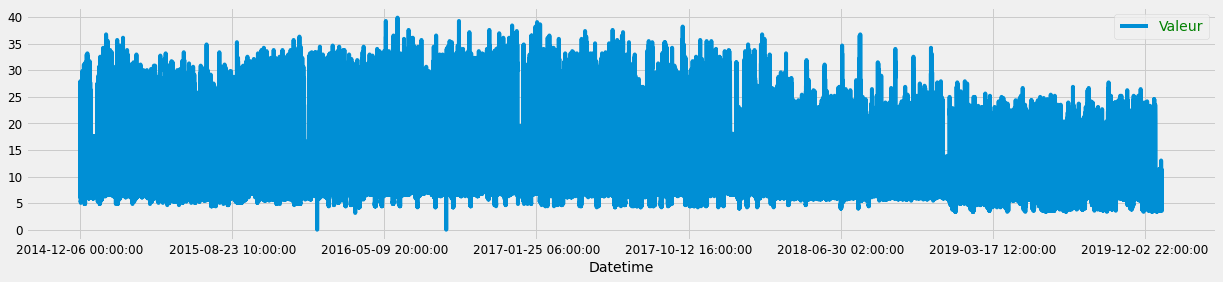

In [8]:
y.plot(figsize =(19,4) )
plt.show()

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [9]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 0, 3, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)


In [ ]:
warnings.filterwarnings("ignore")
aic_min = 100000000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
            if result.aic < ain_min:
                aic_min = results.aic
                par_min = param
                pars_min = param_seasonal
        except: 
            continue
print('Minimum ARIMA{}x{}12 - AIC:{}'.format(par_min,pars_min,aic_min))


ARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:1422066.0990961767
ARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:1234070.5760877216
ARIMA(0, 0, 0)x(0, 0, 2, 7)12 - AIC:1144771.417745274
ARIMA(0, 0, 0)x(0, 0, 3, 7)12 - AIC:1053414.9182963655
ARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:979038.7981554725
ARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:972583.8280304639
ARIMA(0, 0, 0)x(0, 1, 2, 7)12 - AIC:964492.4519493894
ARIMA(0, 0, 0)x(0, 1, 3, 7)12 - AIC:961011.3833242735
ARIMA(0, 0, 0)x(0, 2, 0, 7)12 - AIC:1059041.6807393052
ARIMA(0, 0, 0)x(0, 2, 1, 7)12 - AIC:979043.3848402414
ARIMA(0, 0, 0)x(0, 2, 2, 7)12 - AIC:972585.1371045442
ARIMA(0, 0, 0)x(0, 2, 3, 7)12 - AIC:964451.2603956963
ARIMA(0, 0, 0)x(0, 3, 0, 7)12 - AIC:1186905.3732567078
ARIMA(0, 0, 0)x(0, 3, 1, 7)12 - AIC:1078310.7152873005
ARIMA(0, 0, 0)x(0, 3, 2, 7)12 - AIC:1077572.5849524
ARIMA(0, 0, 0)x(0, 3, 3, 7)12 - AIC:1031727.5730842324
ARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:975327.0696336391
ARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:967712.4421984397
ARIMA(0, 0, 0)x(1, 0, 2

In [8]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(3, 0, 3),
                                seasonal_order=(2, 2, 3, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0849      0.249      8.386      0.000       1.598       2.572
ar.L2         -1.6422      0.499     -3.288      0.001      -2.621      -0.663
ar.L3          0.5095      0.306      1.667      0.096      -0.090       1.109
ma.L1         -1.1532      0.255     -4.525      0.000      -1.653      -0.654
ma.L2          0.3614      0.376      0.961      0.336      -0.375       1.098
ma.L3          0.2452      0.153      1.602      0.109      -0.055       0.545
ar.S.L7       -1.0457      0.174     -6.013      0.000      -1.387      -0.705
ar.S.L14      -0.1928      0.166     -1.165      0.244      -0.517       0.132
ma.S.L7       -0.5913      0.160     -3.693      0.000      -0.905      -0.278
ma.S.L14      -0.7872      0.163     -4.838      0.000      -1.106      -0.468
ma.S.L21       0.5477      0.133      4.106      0.0

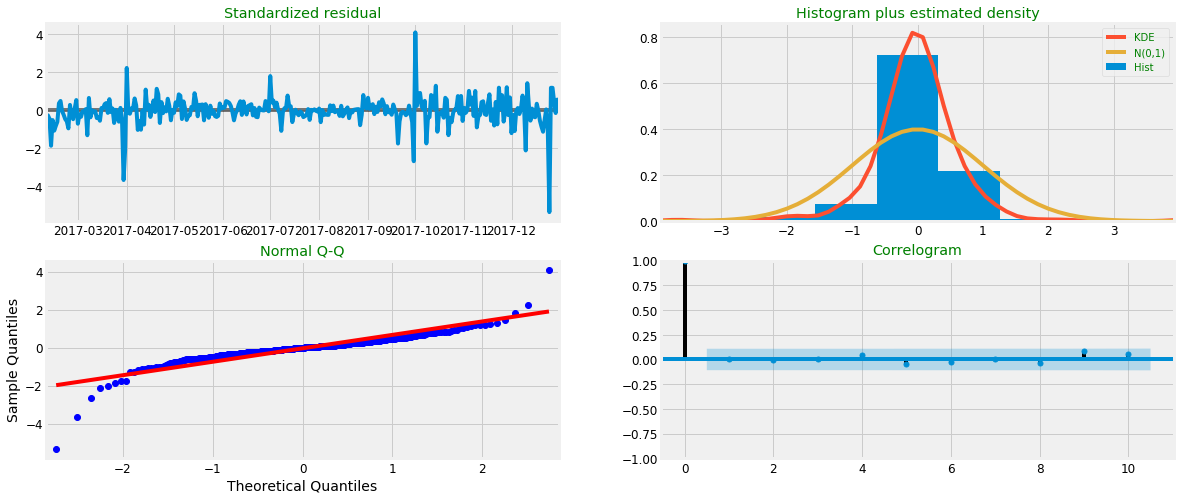

In [9]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [10]:
#Testing the stationarity of the datasets

from statsmodels.tsa.stattools import adfuller

result = adfuller(np.log(X),autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.697394
p-value: 0.432456
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [8]:
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=73976.559670, mean2=98379.430628
variance1=348220106.085875, variance2=432931320.474804


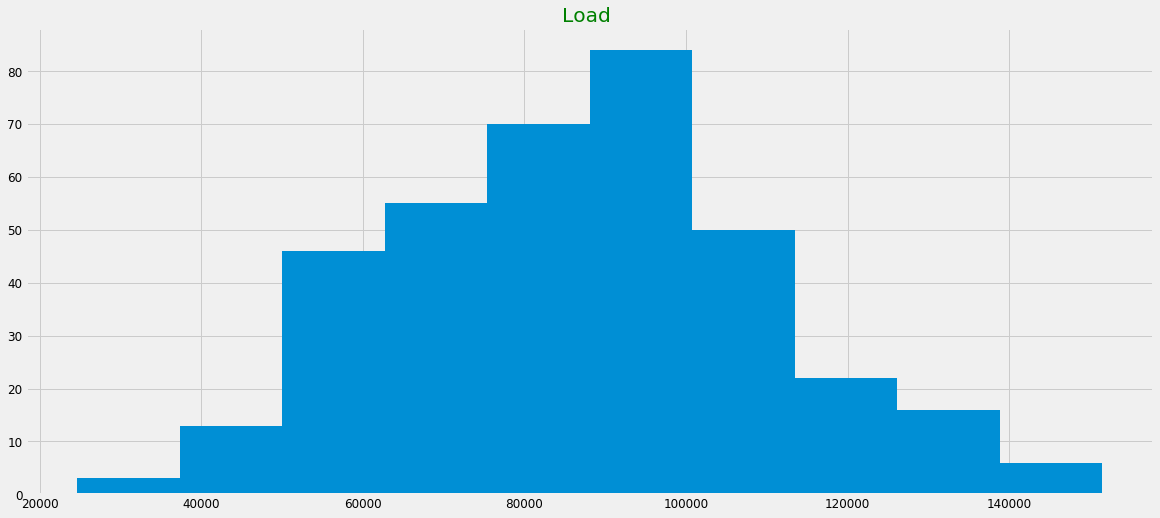

In [10]:
df.hist()
pyplot.show()

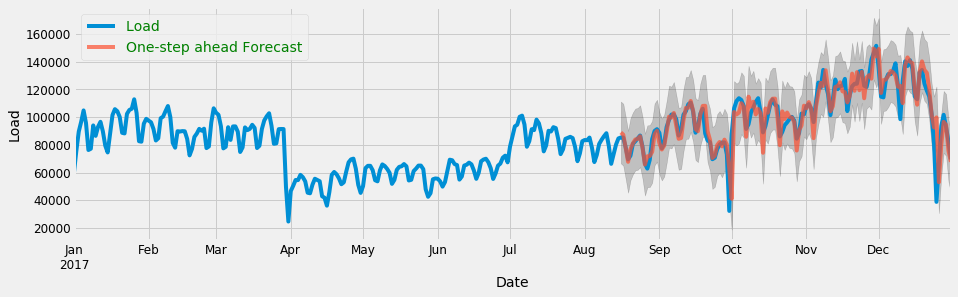

In [12]:
pred = results.get_prediction(start=pd.to_datetime('2017-08-16'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Load')
plt.legend()
plt.show()

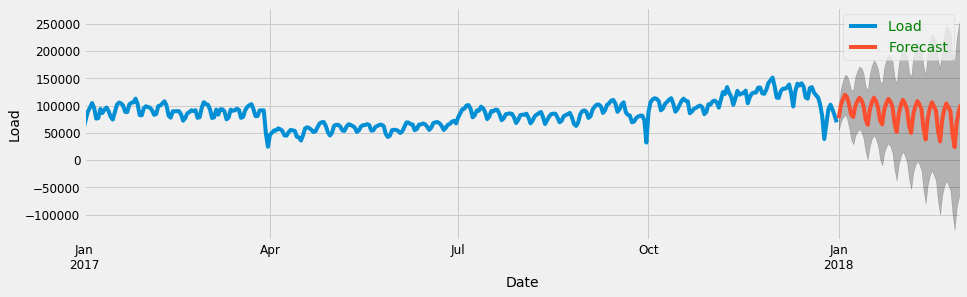

In [13]:

pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Load')
plt.legend()
plt.show()

In [16]:
forecast = pred_uc.predicted_mean
forecast.head(30)

2018-01-01     76958.075790
2018-01-02    100868.416020
2018-01-03    111590.112162
2018-01-04    119976.515055
2018-01-05    115724.411756
2018-01-06    101670.634212
2018-01-07     83172.470536
2018-01-08     79327.212950
2018-01-09     99277.673919
2018-01-10    108449.106938
2018-01-11    114367.571228
2018-01-12    110261.678964
2018-01-13     98828.775416
2018-01-14     74944.155997
2018-01-15     64590.172559
2018-01-16     92399.669811
2018-01-17    106448.773035
2018-01-18    114790.533699
2018-01-19    108233.173418
2018-01-20     96317.818703
2018-01-21     72663.567740
2018-01-22     65673.844285
2018-01-23     92545.706150
2018-01-24    104782.033706
2018-01-25    112557.994246
2018-01-26    107534.932374
2018-01-27     96864.711185
2018-01-28     66909.251147
2018-01-29     51672.234230
2018-01-30     84470.172570
Freq: D, dtype: float64

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-08-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2017-08-16 00:00:00   NaN
2017-08-17 00:00:00   NaN
2017-08-18 00:00:00   NaN
2017-08-19 00:00:00   NaN
2017-08-20 00:00:00   NaN
2017-08-21 00:00:00   NaN
2017-08-22 00:00:00   NaN
2017-08-23 00:00:00   NaN
2017-08-24 00:00:00   NaN
2017-08-25 00:00:00   NaN
2017-08-26 00:00:00   NaN
2017-08-27 00:00:00   NaN
2017-08-28 00:00:00   NaN
2017-08-29 00:00:00   NaN
2017-08-30 00:00:00   NaN
2017-08-31 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-09-02 00:00:00   NaN
2017-09-03 00:00:00   NaN
2017-09-04 00:00:00   NaN
2017-09-05 00:00:00   NaN
2017-09-06 00:00:00   NaN
2017-09-07 00:00:00   NaN
2017-09-08 00:00:00   NaN
2017-09-09 00:00:00   NaN
2017-09-10 00:00:00   NaN
2017-09-11 00:00:00   NaN
2017-09-12 00:00:00   NaN
2017-09-13 00:00:00   NaN
2017-09-14 00:00:00   NaN
                       ..
2017-12-03 00:00:00   NaN
2017-12-04 00:00:00   NaN
2017-12-05 00:00:00   NaN
2017-12-06 00:00:00   NaN
2017-12-07 00:00:00   NaN
2017-12-08 00:00:00   NaN
2017-12-09 0